1. Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

2. Import Dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 3.Perform Below Visualizations.

Univariate Analysis

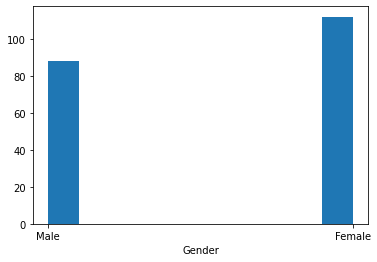

In [4]:
plt.hist(data['Gender']);
plt.xlabel('Gender');


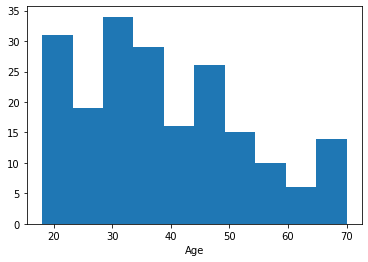

In [5]:
plt.hist(data['Age']);
plt.xlabel('Age');

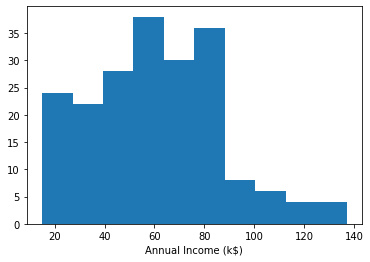

In [6]:
plt.hist(data['Annual Income (k$)']);
plt.xlabel('Annual Income (k$)');

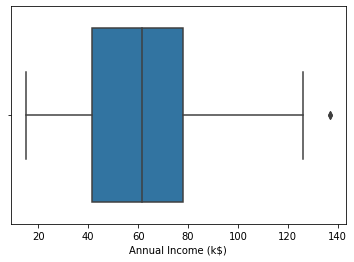

In [8]:
sns.boxplot(x=data['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)');

Bi- Variate Analysis

Text(0, 0.5, 'Annual Income (k$)')

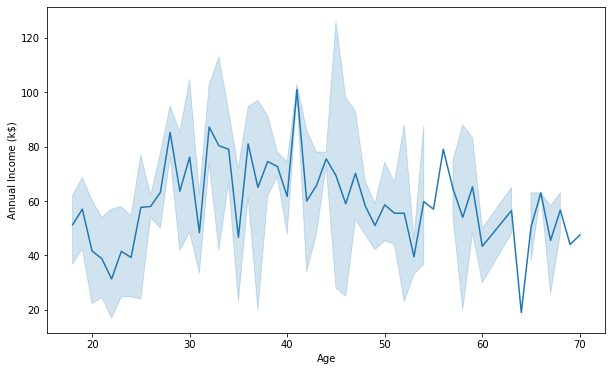

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Annual Income (k$)"]);
plt.xlabel('Age');
plt.ylabel('Annual Income (k$)')

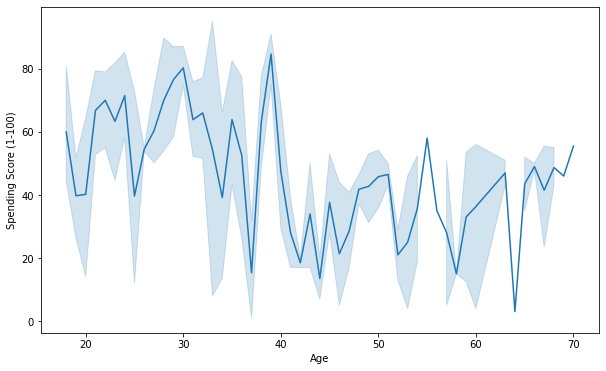

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Spending Score (1-100)"]);
plt.xlabel('Age');
plt.ylabel('Spending Score (1-100)');

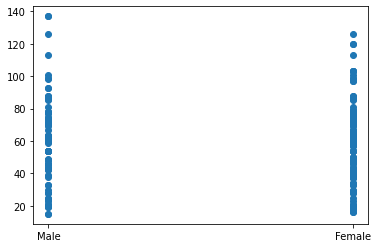

In [12]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

Multi-variate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43263e190>,
      dtype=object)

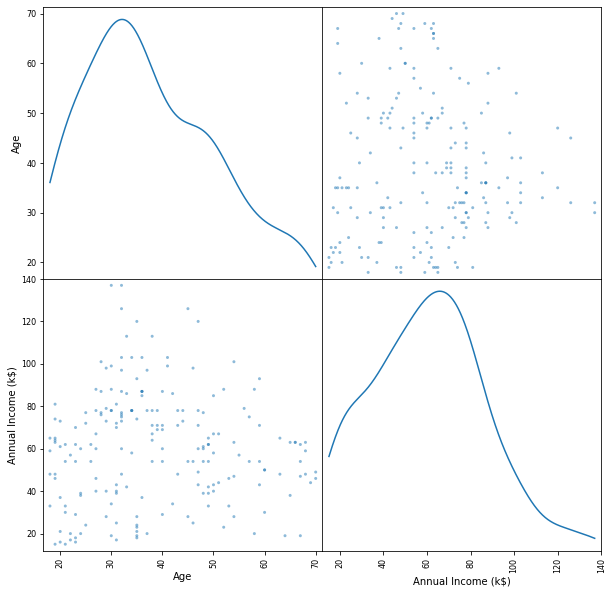

In [13]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)"] , diagonal ="kde", figsize=(10,10))

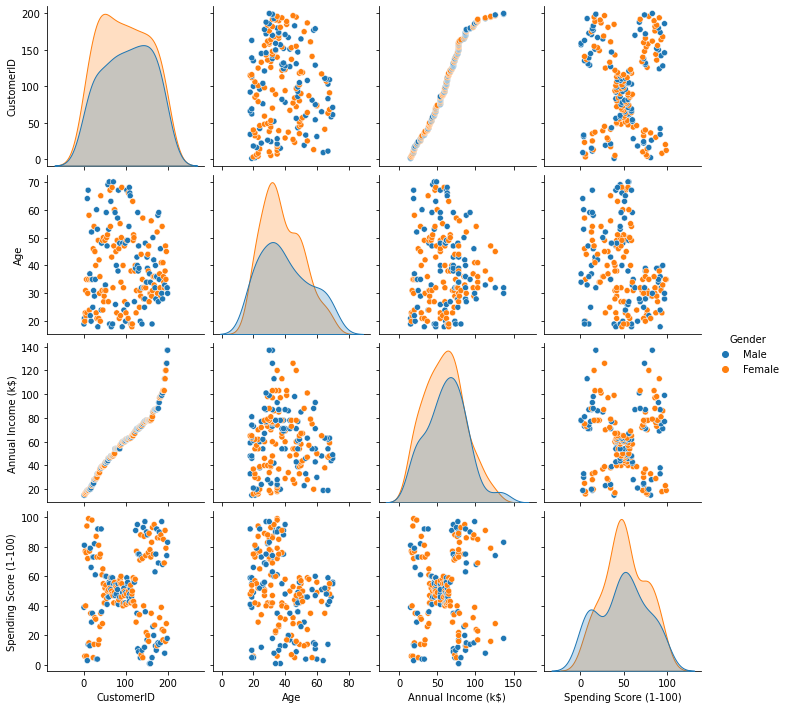

In [14]:
sns.pairplot(data, hue='Gender');

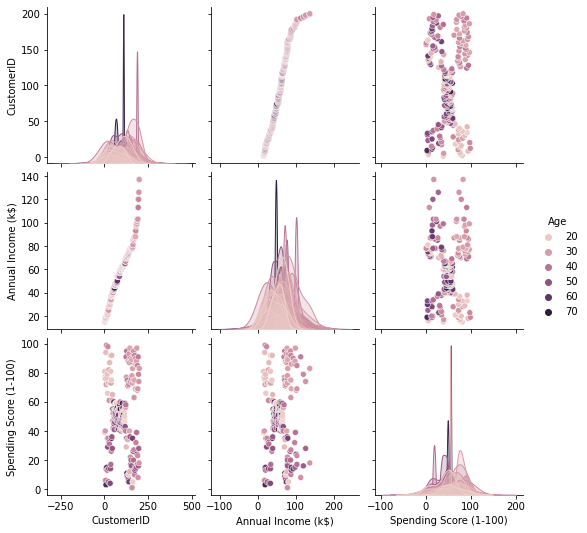

In [15]:
sns.pairplot(data, hue='Age');

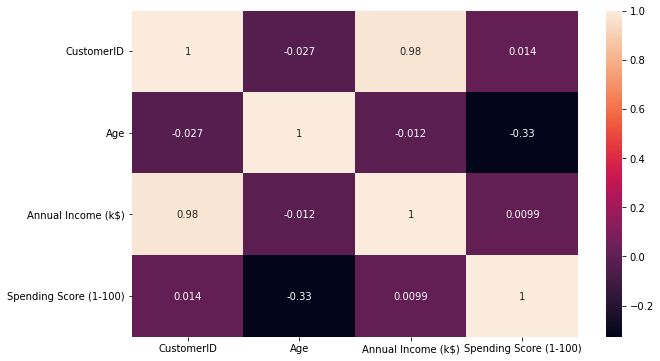

In [17]:
plt.figure(figsize=(10, 6));
sns.heatmap(data.corr(), annot=True)

4. Perform descriptive statistics on the dataset.

In [18]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [21]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

5. Check for Missing values and deal with them

In [22]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6.Find the outliers and replace them outliers

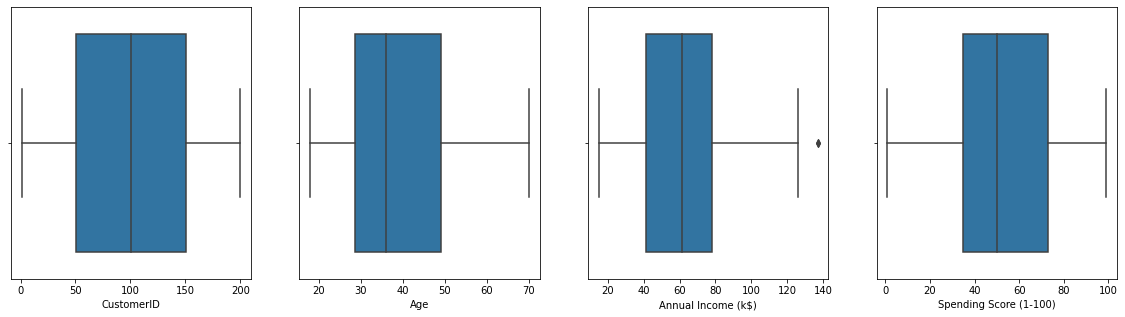

In [23]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])

Handling outlier

In [24]:
quant=data.quantile(q=[0.25,0.75])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [25]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [26]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [27]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [28]:
low=quant.loc[0.25]-(1.5 *iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [29]:
up=quant.loc[0.75]+(1.5 *iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

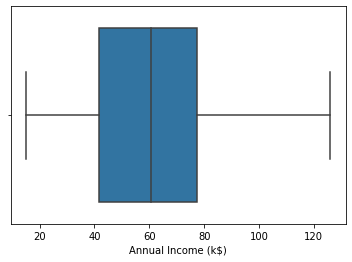

In [30]:
data['Annual Income (k$)']= np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])
sns.boxplot(x=data['Annual Income (k$)'])

7. Check for Categorical columns and perform encoding

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
data['Gender'].replace({'Male':1,"Female":0},inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,60,18


8. Scaling the data

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=sc.fit_transform(data.iloc[:,1:])
df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

9. Perform any of the clustering algorithms

In [36]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)
TWSS

[381550.684068407,
 268082.5676063974,
 191604.8735042735,
 153352.70925185923,
 119223.63779954851,
 101306.70750360748,
 85869.54257642943]

Text(0, 0.5, 'TWSS')

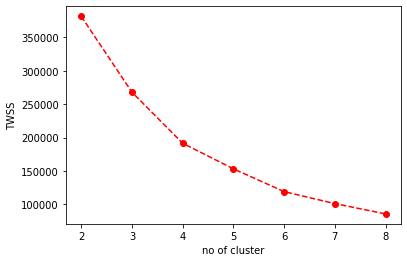

In [37]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [38]:
model=KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

In [39]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [40]:
mb=pd.Series(model.labels_)
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


10. Add the cluster data with the primary dataset

In [41]:
data['clust']=mb
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [42]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,60,18,0
199,200,1,30,60,83,2


11. Split the data into dependent and independent variables


In [43]:
y= data['clust']
y

0      1
1      1
2      1
3      1
4      1
      ..
195    2
196    0
197    2
198    0
199    2
Name: clust, Length: 200, dtype: int32

In [44]:
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
x.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,60,18
199,1,30,60,83


12. Split the data into training and testing

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

13. Build the Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

14. Train the Model

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

15. Test the Model

In [49]:
pred=rf.predict(x_test)

16. Measure the performance using Evaluvation Metrics

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)



0.975

In [51]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 8,  0,  0,  0],
       [ 0, 12,  0,  1],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  9]])